In [1]:
from pandas import read_csv
from numpy import where, average, cumsum, delete
from matplotlib.pyplot import figure, plot, axhline, axvline
from matplotlib.pyplot import scatter, show, yticks, xticks
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from seaborn import heatmap, scatterplot
from sklearn.decomposition import PCA

data = read_csv("C:\\Users\\ivcbibl13\\Desktop\\insurance.csv")

In [2]:
# 1. Сколько в наборе данных объектов и признаков? Дать описание каждому признаку, если оно есть.
data.shape
# 1338 объектов
# 7 признаков (age, sex, bmi, children, smoker, region, charges)

(1338, 7)

In [3]:
# 2. Сколько категориальных признаков, какие?
data.info()
# 3 категориальных признаков (sex, smoker, region)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
# 3. Столбец с максимальным количеством уникальных значений категориального признака?

print(data["sex"].unique())
print(data["smoker"].unique())
print(data["region"].unique())

# region - столбец с максимальным количеством уникальных значений

['female' 'male']
['yes' 'no']
['southwest' 'southeast' 'northwest' 'northeast']


In [5]:
# 4. Есть ли бинарные признаки?
# да (sex, smoker)

In [6]:
# 5. Какие числовые признаки?
# age, bmi, children, charges

In [7]:
# 6. Есть ли пропуски?
data.dropna()
data.info()
# пропусков нет

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
# 7. Сколько объектов с пропусками?
# 0

In [9]:
# 8. Столбец с максимальным количеством пропусков?
# нет такого

In [10]:
# 9. Есть ли на ваш взгляд выбросы, аномальные значения?
data.describe()
# Квартильный диапазон
# age: 24
# bmi: 8,3975
# children: 2
# charges: 11899,625365
# Если какое-то значение не попадает в диапазон [1квартиль- 1,5*квартильный диапазон; 3квартиль + 1,5*квартильный диапазон]
# Диапазоны для переменных
# age: [-9; 87]
# bmi: [13,7; 47,3]
# children: [-3; 5]
# charges: [-13109,2; 34490] -> наблюдаются выбросы

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [11]:
data["age"] = (data["age"] - data["age"].mean())/data["age"].std()
data["bmi"] = (data["bmi"] - data["bmi"].mean())/data["bmi"].std()
data["children"] = (data["children"] - data["children"].mean())/data["children"].std()
data["charges"] = (data["charges"] - data["charges"].mean())/data["charges"].std()

data["sex"] = where(data["sex"] == "male", 1, 0)
data["sex"].astype('int')
data["smoker"] = where(data["smoker"] == "yes", 1, 0)
data["smoker"].astype('int')

data["northeast"] = where(data["region"] == "northeast", 1, 0)
data["northwest"] = where(data["region"] == "northwest", 1, 0)
data["southeast"] = where(data["region"] == "southeast", 1, 0)
data["southwest"] = where(data["region"] == "southwest", 1, 0)

data = data.drop(columns= ["region"])

data.describe()

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
count,1.338000e+03,1338.000000,1.338000e+03,1.338000e+03,1338.000000,1.338000e+03,1338.000000,1338.000000,1338.000000,1338.000000
mean,-1.810543e-16,0.505232,1.553275e-15,-2.540735e-16,0.204783,-9.724824e-17,0.242152,0.242900,0.272048,0.242900
std,1.000000e+00,0.500160,1.000000e+00,1.000000e+00,0.403694,1.000000e+00,0.428546,0.428995,0.445181,0.428995
min,-1.509401e+00,0.000000,-2.411110e+00,-9.082741e-01,0.000000,-1.003182e+00,0.000000,0.000000,0.000000,0.000000
25%,-8.688299e-01,0.000000,-7.161386e-01,-9.082741e-01,0.000000,-7.043871e-01,0.000000,0.000000,0.000000,0.000000
50%,-1.473495e-02,1.000000,-4.319265e-02,-7.873775e-02,0.000000,-3.210888e-01,0.000000,0.000000,0.000000,0.000000
75%,8.393600e-01,1.000000,6.609101e-01,7.507986e-01,0.000000,2.782401e-01,0.000000,0.000000,1.000000,0.000000
max,1.764630e+00,1.000000,3.684145e+00,3.239407e+00,1.000000,4.170104e+00,1.000000,1.000000,1.000000,1.000000


In [12]:
# 10. Столбец с максимальным средним значением после нормировки признаков через стандартное отклонение?
# bmi - 1.553275e-15

In [13]:
# 11. Столбец с целевым признаком?
# В качестве целевого взят charges

In [14]:
# 12. Сколько объектов попадает в тренировочную выборку при использовании 
# train_test_split с параметрами test_size = 0.3, random_state = 42?

charges = data.loc[:,data.columns.isin(["charges"])]
other_vars = data.loc[:,data.columns.isin(["age","sex","bmi","children","smoker","northeast","northwest","southeast","southwest"])]

x_train, x_test, y_train, y_test = train_test_split(other_vars, charges, test_size = 0.3, random_state = 42)
x_test.info()

# 402

<class 'pandas.core.frame.DataFrame'>
Int64Index: 402 entries, 764 to 1295
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        402 non-null    float64
 1   sex        402 non-null    int32  
 2   bmi        402 non-null    float64
 3   children   402 non-null    float64
 4   smoker     402 non-null    int32  
 5   northeast  402 non-null    int32  
 6   northwest  402 non-null    int32  
 7   southeast  402 non-null    int32  
 8   southwest  402 non-null    int32  
dtypes: float64(3), int32(6)
memory usage: 22.0 KB


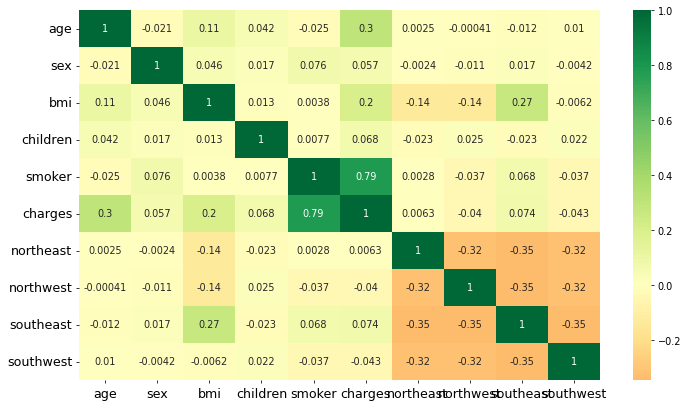

In [15]:
# 13. Между какими признаками наблюдается линейная зависимость (корреляция)?
figure(figsize=(12,7), dpi= 70)
heatmap(data.corr(), xticklabels=data.corr().columns, yticklabels=data.corr().columns, cmap="RdYlGn",center=0,annot=True)

xticks(fontsize=13)
yticks(fontsize=13)
show()

# Наблюдается сильная линейная зависимость между smoker и charges

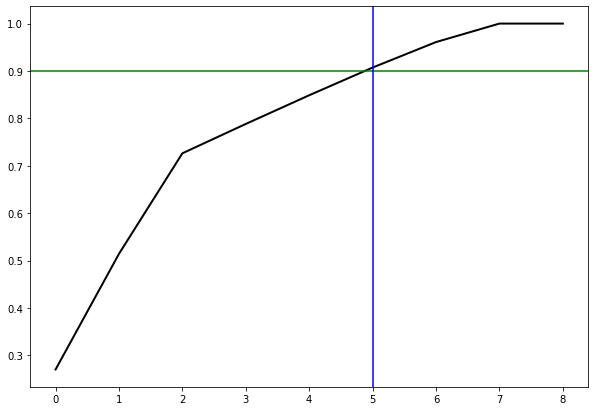

In [16]:
# 14. Сколько признаков достаточно для объяснения 90% дисперсии после применения метода PCA?
pca = PCA()
pca.fit(x_train)
figure(figsize=(10,7))
plot(cumsum(pca.explained_variance_ratio_), color='k', lw=2)
axhline(0.9, c='g')
axvline(5, c='b')

# достаточно 5 признаков


In [17]:
# 15. Какой признак вносит наибольший вклад в первую компоненту?
for value, column in zip(pca.components_[0],x_train.columns):
    print(column," - Coefficient: ", value)
# наибольший вклад вносит age

age  - Coefficient:  -0.7353248370264828
sex  - Coefficient:  0.0018361450943441186
bmi  - Coefficient:  -0.5545458330562381
children  - Coefficient:  -0.3816587000636754
smoker  - Coefficient:  0.011280864437922498
northeast  - Coefficient:  0.04428056387141872
northwest  - Coefficient:  0.02337537360659022
southeast  - Coefficient:  -0.05818439561506345
southwest  - Coefficient:  -0.009471541862945486


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


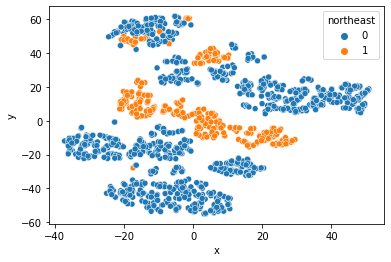

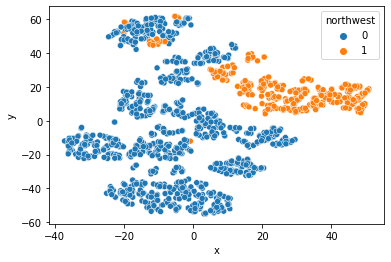

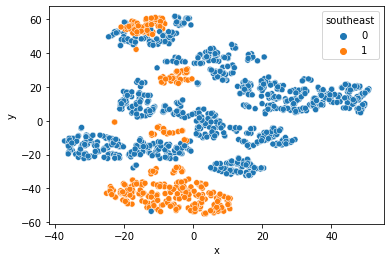

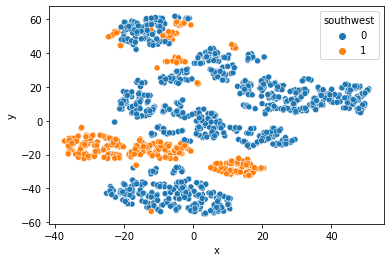

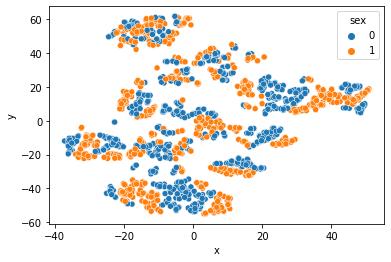

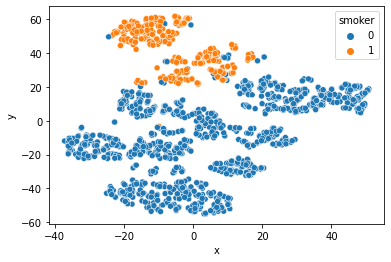

In [18]:
# 16. Построить двухмерное представление данных с помощью алгоритма t-SNE. На
# сколько кластеров визуально, на ваш взгляд, разделяется выборка? Объяснить смысл кластеров.
tsne = TSNE(learning_rate= 100, metric='euclidean', random_state=42)

_data = tsne.fit_transform(data)
data["x"] = _data[:,0]
data["y"] = _data[:,1]
plt = scatterplot(data = data, x="x", y="y", hue = "northeast")
show()
plt = scatterplot(data = data, x="x", y="y", hue = "northwest")
show()
plt = scatterplot(data = data, x="x", y="y", hue = "southeast")
show()
plt = scatterplot(data = data, x="x", y="y", hue = "southwest")
show()
plt = scatterplot(data = data, x="x", y="y", hue = "sex")
show()
plt = scatterplot(data = data, x="x", y="y", hue = "smoker")
show()
# Визуально делится на 2 кластера
# Левый кластер - курильщики
# Правый кластер не курильщики.
# 4 кластера: регионы